In [190]:
#Imports
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

In [191]:
'''Function to return last training accuracy and variance'''

def get_results(filename):
    file = open(filename, 'r')
    lines = file.readlines()
    test_accuracy = float(lines[-4].split(' ')[-1].strip())
    variance = float(lines[-1].split(' ')[-1].strip())
    return test_accuracy, variance


In [192]:

'''1+2). Table 1 for FEMNIST'''''
table_data = [
    ['Methods', 'clean', '20%(A1)', '50%(A1)', '80%(A1)', '20%(A2)', '50%(A2)', '80%(A2)', '10%(A3)', '20%(A3)', '50%(A3)']
]

methods = ['global', 'local', 'ditto', 'fedavgper']
for method in methods:
    row = [method]
    if method=='fedavgper':
        dir_name = 'Ques2'
    else:
        dir_name = 'Ques1'
    filename = dir_name + '/results/' + method + '_femnist_1_0.txt'
    accuracy, variance = get_results(filename)
    row.append('{:.2f}({:.2f})'.format(accuracy, variance))
    for adversary in range(1, 4):
        for percent in [0.2, 0.5, 0.8]:
            
            filename = dir_name+'/results/' + method + '_femnist_' + str(adversary) + '_' + str(percent) + '.txt'
            accuracy, variance = get_results(filename)
            row.append('{:.2f}({:.2f})'.format(accuracy, variance))
    table_data.append(row)

table_name = 'Table 1 for FEMNIST'
pd_dataframe = pd.DataFrame(table_data[1:], columns=table_data[0])
table_output = tabulate(pd_dataframe, headers='keys', tablefmt='psql')

print(f"{'=' * 10} {table_name} {'=' * 10}\n")
print(table_output)


========== Table 1 for FEMNIST ==========

+----+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
|    | Methods   | clean      | 20%(A1)    | 50%(A1)    | 80%(A1)    | 20%(A2)    | 50%(A2)    | 80%(A2)    | 10%(A3)    | 20%(A3)    | 50%(A3)    |
|----+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------|
|  0 | global    | 0.06(0.00) | 0.06(0.00) | 0.06(0.00) | 0.06(0.00) | 0.06(0.00) | 0.06(0.00) | 0.06(0.00) | 0.06(0.00) | 0.06(0.00) | 0.06(0.00) |
|  1 | local     | 0.11(0.01) | 0.09(0.01) | 0.06(0.01) | 0.03(0.01) | 0.09(0.01) | 0.06(0.00) | 0.03(0.00) | 0.09(0.01) | 0.06(0.01) | 0.03(0.00) |
|  2 | ditto     | 0.74(0.02) | 0.64(0.02) | 0.52(0.02) | 0.08(0.00) | 0.62(0.02) | 0.45(0.02) | 0.28(0.02) | 0.16(0.01) | 0.10(0.01) | 0.06(0.00) |
|  3 | fedavgper | 0.73(0.01) | 0.71(0.02) | 0.62(0.02) | 0.35(

In [193]:
''' 1+2). Table 1 for fmnist dataset'''
table_data = [
    ['Methods', 'clean', '20%(A1)', '50%(A1)', '80%(A1)', '20%(A2)', '50%(A2)', '80%(A2)', '10%(A3)', '20%(A3)', '50%(A3)']
]

methods = ['global', 'local', 'ditto','fedavgper']
for method in methods:
    row = [method]
    if method=='fedavgper':
        dir_name = 'Ques2'
    else:
        dir_name = 'Ques1'
    filename = dir_name+'/results/' + method + '_fmnist_1_0.txt'
    accuracy, variance = get_results(filename)
    row.append('{:.2f}({:.2f})'.format(accuracy, variance))
    for adversary in range(1, 4):
        for percent in [0.2, 0.5, 0.8]:
            filename = dir_name+'/results/' + method + '_fmnist_' + str(adversary) + '_' + str(percent) + '.txt'
            accuracy, variance = get_results(filename)
            row.append('{:.2f}({:.2f})'.format(accuracy, variance))
    table_data.append(row)
table_name = 'Table 1 for FMNIST'
pd_dataframe = pd.DataFrame(table_data[1:], columns=table_data[0])
table_output = tabulate(pd_dataframe, headers='keys', tablefmt='psql')

print(f"{'=' * 10} {table_name} {'=' * 10}\n")
print(table_output)

========== Table 1 for FMNIST ==========

+----+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
|    | Methods   | clean      | 20%(A1)    | 50%(A1)    | 80%(A1)    | 20%(A2)    | 50%(A2)    | 80%(A2)    | 10%(A3)    | 20%(A3)    | 50%(A3)    |
|----+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------|
|  0 | global    | 0.11(0.02) | 0.11(0.02) | 0.11(0.03) | 0.11(0.03) | 0.11(0.02) | 0.11(0.03) | 0.11(0.03) | 0.11(0.02) | 0.11(0.03) | 0.11(0.03) |
|  1 | local     | 0.85(0.02) | 0.70(0.02) | 0.48(0.02) | 0.27(0.02) | 0.70(0.02) | 0.48(0.02) | 0.27(0.02) | 0.70(0.02) | 0.48(0.02) | 0.27(0.02) |
|  2 | ditto     | 0.94(0.01) | 0.83(0.01) | 0.64(0.01) | 0.41(0.01) | 0.81(0.01) | 0.63(0.01) | 0.43(0.01) | 0.81(0.01) | 0.66(0.01) | 0.33(0.01) |
|  3 | fedavgper | 0.90(0.01) | 0.89(0.01) | 0.88(0.01) | 0.83(0

# Results and observations
- The results obtained above are closly matching with the results obtained from the paper for low attacks.
- For high attacks, the results are not exactly matching, but the trend is same.
- In case of global, the results are very much less compared to the paper but it may be because further fine-tuning of the hyperparameters is required. Apart from that we need to run it for more rounds and epochs to obtain the exact results.
- In case of local, the lambda taken is 0, for global lambda is taken as 100 and for ditto the lambda is taken as given in the paper.
- fedavgper is performing better than ditto on some attacks and on femnist dataset. Mostly on lower attacks, it is performing good because of the reason that it is taking average of the weights of the clients which are reliable and also running local epochs at the end to finetune the model. In case of strong attacks, it is not performing good because it is taking into account the results of currupted devices also which is making it deviate from the actual results. Running local epochs doesn't change it much because the weights are already deviated from the actual weights.

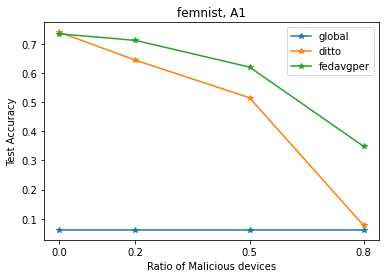

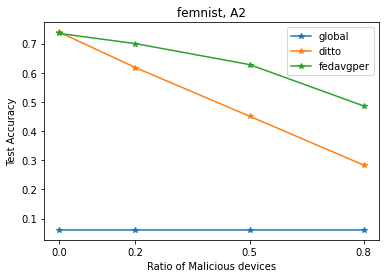

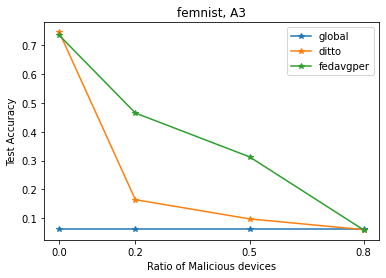

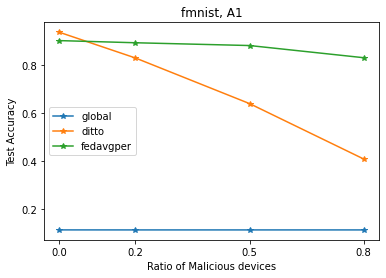

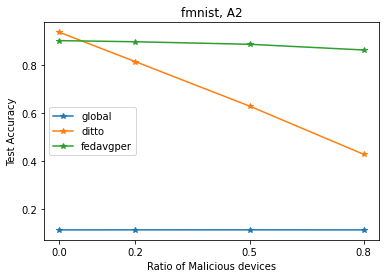

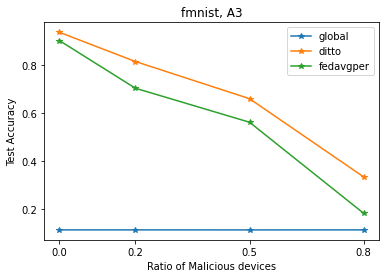

In [194]:
'''1+2) Figure 3'''
def plot_accuracy_vs_ratio(dataset_name, adversary):
    x = [0, 0.2, 0.5, 0.8]
    methods = ['global', 'ditto', 'fedavgper']
    for method in methods:
        y = []
        if method=='fedavgper':
            dir_name = 'Ques2'
        else:
            dir_name = 'Ques1'
        for percent in x:
            filename = dir_name+'/results/' + method + '_' + dataset_name + '_' + str(adversary) + '_' + str(percent) + '.txt'
            accuracy, variance = get_results(filename)
            y.append(accuracy)
        plt.plot(x, y, label=method, marker='*')
        
for dataset in ['femnist', 'fmnist']:
    for adversary in range(1,4):
        plot_accuracy_vs_ratio(dataset, adversary)
        plt.xlabel('Ratio of Malicious devices')
        plt.xticks([0, 0.2, 0.5, 0.8])
        plt.ylabel('Test Accuracy')
        plt.legend()
        plt.title(dataset + ', A' + str(adversary))
        plt.show()
        

# Observations
- As shown in Table 1, the graphs are matching with the results obtained from the paper for low attacks.
- The results are not closely matching for high attacks but the trend is same.

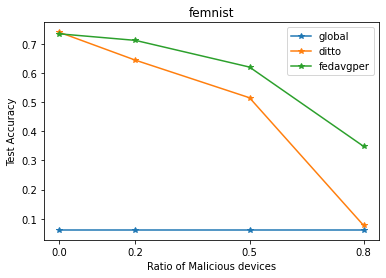

FileNotFoundError: [Errno 2] No such file or directory: 'Ques1/results/ditto_celeba_1_0.8.txt'

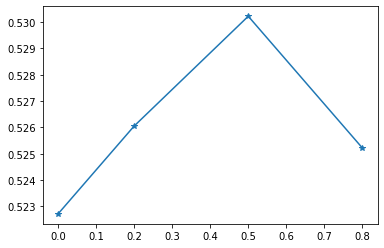

In [195]:
''' 1+2). Figure 4: ditto, global, fedavgper for femnist and celeba'''

datasets = ['femnist', 'celeba']
for dataset in datasets:
    x = [0, 0.2, 0.5, 0.8]
    methods = ['global', 'ditto', 'fedavgper']
    for method in methods:
        y = []
        if method=='fedavgper':
            dir_name = 'Ques2'
        else:
            dir_name = 'Ques1'
        for percent in x:
            filename = dir_name+'/results/' + method + '_' + dataset + '_1_' + str(percent) + '.txt'
            accuracy, variance = get_results(filename)
            y.append(accuracy)
        plt.plot(x, y, label=method, marker='*')
    plt.xlabel('Ratio of Malicious devices')
    plt.xticks([0, 0.2, 0.5, 0.8])
    plt.ylabel('Test Accuracy')
    plt.legend()
    plt.title(dataset)
    plt.show()


# Observations


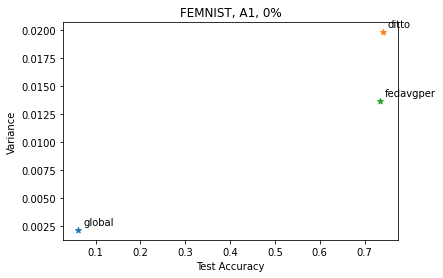

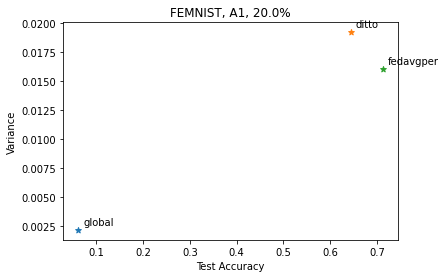

In [ ]:
'''1+2). variance vs test accuracy for ditto, global, fedavgper for femnist at 0% adversary and 20% adversary'''
methods = ['global', 'ditto', 'fedavgper']
for adversary in [0, 0.2]:
    fig, ax = plt.subplots()
    accuracies = []
    variances = []
    for method in methods:
        if method == 'fedavgper':
            dir_name = 'Ques2'
        else:
            dir_name = 'Ques1'
        filename = dir_name + '/results/' + method + '_femnist_1_' + str(adversary) + '.txt'
        accuracy, variance = get_results(filename)
        accuracies.append(accuracy)
        variances.append(variance)
        ax.scatter(accuracy, variance, label=method, marker='*')
    for i, txt in enumerate(methods):
        ax.annotate(txt, (accuracies[i], variances[i]), xytext=(5,5), textcoords='offset points')
    plt.xlabel('Test Accuracy')
    plt.ylabel('Variance')
    plt.title('FEMNIST, A1, ' + str(adversary * 100) + '%')
    plt.show()


# Observations
- At 0% adversary, ditto is showing higher variance at similar accuracy with fedavgper. Hence fedavgper is fairer than ditto.
- At 20% adversary also, ditto is showing higher variance at similar accuracy with fedavgper. Hence fedavgper is fairer than ditto. This may be because fedavgper is learning local epochs at the end which is making it more robust to the attacks.

In [ ]:
'''1+2). Table 2: accuracy(variance) for ditto, global, fedavgper for feminist, celeba at 0% and 50% adversary'''

table_data = [ 
              [
    'Methods',
    'Femnist(0%)',
    'Celeba(0%)',
    'Femnist(50%)',
    'Celeba(50%)'
    ]
]
methods = ['global', 'ditto', 'fedavgper', 'l2sgd']
for method in methods:
    if method=='fedavgper':
        dir_name = 'Ques2'
    else:
        dir_name = 'Ques1'
    table_data.append([method])
    for adversary in [0, 0.5]:
        for dataset in ['femnist', 'celeba']:
            filename = dir_name+'/results/' + method + '_' + dataset + '_1_' + str(adversary) + '.txt'
            accuracy, variance = get_results(filename)
            table_data[-1].append('{:.2f}({:.2f})'.format(accuracy, variance))

table_name = 'Table 2(Adversary A1)'
pd_dataframe = pd.DataFrame(table_data[1:], columns=table_data[0])
table_output = tabulate(pd_dataframe, headers='keys', tablefmt='psql')
print(f"{'=' * 10} {table_name} {'=' * 10}\n")
print(table_output)

========== Table 2(Adversary A1) ==========

+----+-----------+---------------+--------------+----------------+---------------+
|    | Methods   | Femnist(0%)   | Celeba(0%)   | Femnist(50%)   | Celeba(50%)   |
|----+-----------+---------------+--------------+----------------+---------------|
|  0 | global    | 0.06(0.00)    | 0.52(0.11)   | 0.06(0.00)     | 0.53(0.11)    |
|  1 | ditto     | 0.74(0.02)    | 0.91(0.04)   | 0.52(0.02)     | 0.51(0.08)    |
|  2 | fedavgper | 0.73(0.01)    | 0.92(0.03)   | 0.62(0.02)     | 0.50(0.08)    |
|  3 | l2sgd     | 0.11(0.01)    | 0.70(0.08)   | 0.06(0.01)     | 0.52(0.08)    |
+----+-----------+---------------+--------------+----------------+---------------+


# Observations
- The results obtained here is matching the results obtained from the paper except for global for the reason stated above.
- ditto is performing better than l2sgd. On some cases, fedavgper is outperforming ditto. This may be because fedavgper is learning local epochs at the end which is making it more robust to the attacks on some datasets if the clients has more samples.

# Fairness in adult dataset

- The adult dataset contains more male datapoints than female. To be precise, the percentage of male is around 66%. Hence, if the gender parameter is an important feature, the learning algorithm will converge more towards making accuracy for males more. This leads to unfairness as the overall loss is highly weighted by the datapoints of male. To make it fairer, we design a new loss function for our SVM model. The loss function is as follows:


    $\text{loss} = 0.01 \sum_{i=1}^{62} W_i^2 + \frac{1}{n} \sum_{i=1}^{n} \max(0, 1 - \text{labels}_i \cdot \text{y\_pred}_i) \cdot \max(2(2\text{features}_{i,3}-1), 3(1-(2\text{features}_{i,3}-1)))$

- The loss function gives a weight of $6$ to female datapoints and a weight of $2$ to male datapoints. This higher penalty to inaccuracy for females makes the model fairer. We did not include any loss term seeking more TPR as we can achieve it by predicting all inputs as positive but it will lead to poor accuracy.

- To measure the fairness, we use the following metric:

    $fairness = \frac{{\text{{TPR}}_{\text{{female}}}}}{{\text{{TPR}}_{\text{{male}}}}}$

- TPR is the true positive rate given by the formula:
    
    $TPR = \frac{\text{true positives}}{\text{true positives} + \text{false negatives}}$

- We define a model A to be fairer than model B if the fairness metric of model A is greater than model B for this dataset. However for any general dataset, we define model A to be fairer than model B if the fairness metric of model A is close to 1 compared to model B.

- In this dataset, we focus to make model fair to female. Hence we will consider a model fair if the fairness metric for the model is more.

- The number of attributes in the dataset is 14. Since we have used 1 hot encoding over categorical variables, the number of features is 62. We choose one-hot encoding over mapping it to integers to avoid any bias in the model.

- We have two models for adult dataset. One is SMV and other is SVM_fair. SVM model uses the usual loss function for SVMs. SVM_fair uses the loss function defined above. We have used the same hyperparameters for both the models. We will make all comparisons between these two models using ditto.

- The results obtained are shown below.

In [ ]:
''' 3). Getting the values from the generated files'''
def get_accuracy_variance_tpr(filename):
    file = open(filename, 'r')
    lines = file.readlines()
    test_accuracy = float(lines[-4].split(' ')[-1].strip())
    variance = float(lines[-1].split(' ')[-1].strip())
    tpr_male = float(lines[-8].split(' ')[-1].strip())
    tpr_female = float(lines[-7].split(' ')[-1].strip())
    return test_accuracy, variance, tpr_male, tpr_female

In [ ]:
'''3). Table 1: Table for tpr rates for adult dataset on SVM and SVM_fair'''
models = ['svm', 'svm_fair']
method='ditto'
adversaries = [1,2,3]
ratios = [0.2, 0.5, 0.8]
table_data = [
    ['model', 'clean', 'A1(20%)', 'A1(50%)', 'A1(80%)', 'A2(20%)', 'A2(50%)', 'A2(80%)', 'A3(20%)', 'A3(50%)', 'A3(80%)']
]
for model in models:
    filename = 'Ques3/results/' + method + '_adult' + '_1_0_'+model+'.txt'
    accuracy, variance, male_tpr, female_tpr = get_accuracy_variance_tpr(filename)
    row = [model]
    row.append('{:.2f}({:.2f})'.format(female_tpr/male_tpr, accuracy))
    for adversary in adversaries:
        for ratio in ratios:
            filename = 'Ques3/results/' + method + '_adult_' + str(adversary) + '_' + str(ratio) + '_' + model + '.txt'
            accuracy, variance, male_tpr, female_tpr = get_accuracy_variance_tpr(filename)
            row.append('{:.2f}({:.2f})'.format(female_tpr/male_tpr, accuracy))
    table_data.append(row)
table_name = 'Table 1 for Adult(Cells denote fairness(accuracy))'
pd_dataframe = pd.DataFrame(table_data[1:], columns=table_data[0])
table_output = tabulate(pd_dataframe, headers='keys', tablefmt='psql')
print(f"{'=' * 10} {table_name} {'=' * 10}\n")
print(table_output)

========== Table 1 for Adult(Cell denote fairness(accuracy)) ==========

+----+----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
|    | model    | clean      | A1(20%)    | A1(50%)    | A1(80%)    | A2(20%)    | A2(50%)    | A2(80%)    | A3(20%)    | A3(50%)    | A3(80%)    |
|----+----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------|
|  0 | svm      | 0.72(0.84) | 0.83(0.80) | 0.95(0.26) | 1.36(0.20) | 0.74(0.83) | 0.87(0.56) | 0.85(0.35) | 0.98(0.72) | 1.19(0.21) | 1.33(0.19) |
|  1 | svm_fair | 0.89(0.84) | 0.90(0.82) | 0.95(0.25) | 1.11(0.20) | 0.88(0.84) | 0.98(0.35) | 0.95(0.33) | 0.82(0.76) | 1.06(0.20) | 1.20(0.18) |
+----+----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+


# Observations
- svm_fair is fairer than svm as the fairness metric is more for svm_fair.
- On strong attacks(A3), svm is giving more fairness than svm_fair. This is because the number of males in the sample is large and hence more corrupt data is present for males than females. This leads to poor results for male when svm_fair is used.
- The accuracy of svm_fair is almost same or slighly low on some cases because we are introducing bias in the model by weighting the loss function. However, the fairness metric is more for svm_fair.

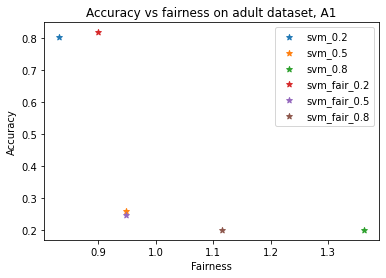

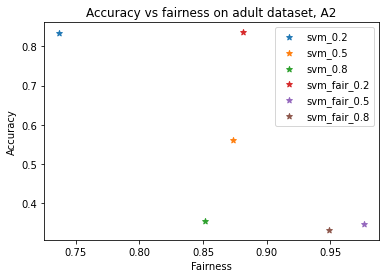

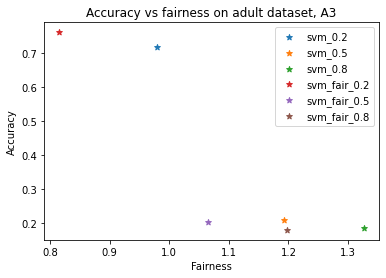

In [ ]:
'''3). fairness vs accuracy for adult dataset on SVM and SVM_fair'''

models = ['svm', 'svm_fair']
method='ditto'
adversaries = [1,2,3]
ratios = [0.2, 0.5, 0.8]
for adversary in adversaries:
    fig, ax = plt.subplots()
    for model in models:
        for ratio in ratios:
                filename = 'Ques3/results/' + method + '_adult_' + str(adversary) + '_' + str(ratio) + '_' + model + '.txt'
                accuracy, variance, male_tpr, female_tpr = get_accuracy_variance_tpr(filename)
                ax.scatter(female_tpr/male_tpr, accuracy, label='{}_{}'.format(model, ratio), marker='*')
                
    plt.xlabel('Fairness')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs fairness on adult dataset, A' + str(adversary))
    plt.legend()
    plt.show()


# Observations
- Here we can observe that as fairness increases, the accuracy decreaces. The reason is stated above.
- However, there are some results which are not following this trend on A2.
- On attack A3, the model becomes unfair for Male because it is a strong attack and the model is biased towards females whose number is less in the dataset.

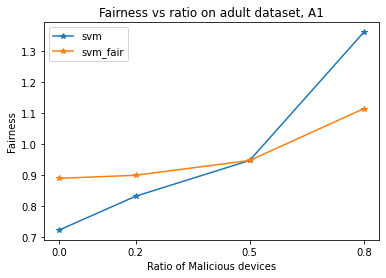

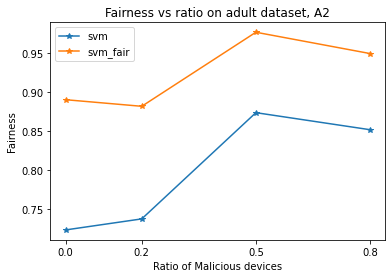

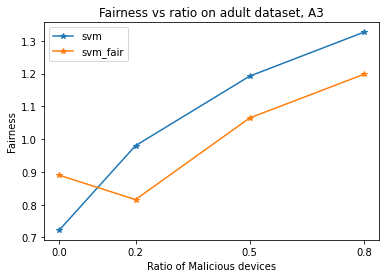

In [ ]:
''' 3). Fairness vs adversarial ratio for adult dataset on SVM and SVM_fair'''

models = ['svm', 'svm_fair']
adversaries = [1,2,3]
ratios = [0, 0.2, 0.5, 0.8]
for adversary in adversaries:
    for model in models:
        y=[]
        for ratio in ratios:
            
            filename = 'Ques3/results/' + method + '_adult_' + str(adversary) + '_' + str(ratio) + '_' + model + '.txt'
            accuracy, variance, male_tpr, female_tpr = get_accuracy_variance_tpr(filename)
            y.append(female_tpr/male_tpr)
        plt.plot(ratios, y, label=model, marker='*')
    plt.xlabel('Ratio of Malicious devices')
    plt.xticks([0, 0.2, 0.5, 0.8])
    plt.ylabel('Fairness')
    plt.legend()
    plt.title('Fairness vs ratio on adult dataset, A' + str(adversary))
    plt.show()

# Observations
- Here also, the fairness is increasing at higher attacks. The reason is stated above.
- On A3, svm_fair has lower fairness than svm because it being strong attack.